### Preprocessing

In [27]:
import pandas as pd

In [45]:
df = pd.read_table('pdbbind/data/index/INDEX_general_PL_data.2020',skiprows=4,sep=r'\s+',usecols=[0,4]).drop(0)
df = df.rename(columns={'#': 'name','release': 'affinity'})
df_refined = pd.read_table('pdbbind/data/index/INDEX_refined_data.2020',skiprows=4,sep=r'\s+',usecols=[0,4]).drop(0)
df_refined = df_refined.rename(columns={'#': 'name','release': 'affinity'})
df = pd.concat([df,df_refined])

In [46]:
quantities = ['ki','kd','ka','k1/2','kb','ic50','ec50']

In [47]:
from pint import UnitRegistry
ureg = UnitRegistry()

def to_uM(affinity):
    val = ureg(affinity)
    try:
        return val.m_as(ureg.uM)
    except Exception:
        pass
    
    try:
        return 1/val.m_as(1/ureg.uM)
    except Exception:
        pass

In [48]:
df['affinity_uM'] = df['affinity'].str.split('[=\~><]').str[1].apply(to_uM)
df['affinity_quantity'] = df['affinity'].str.split('[=\~><]').str[0]

<AxesSubplot:>

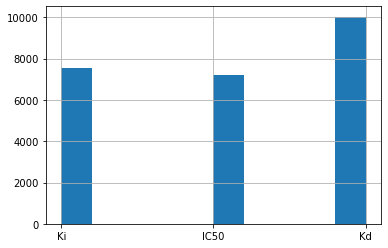

In [49]:
df['affinity_quantity'].hist()

In [50]:
df_filter = df[df['affinity_quantity'].str.lower().isin(quantities)]

In [51]:
df_complex = pd.read_parquet('data/pdbbind_complex.parquet')

In [52]:
df_all = df_complex.merge(df_filter,on='name').drop('affinity',axis=1)

In [53]:
df_all.to_parquet('data/pdbbind.parquet')

In [54]:
len(df_all)

24759